# Inaugural Project

Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2


# Import your own code
from inauguralproject import ExchangeEconomyClass

# Question 1 - Edgeworth box

Using two for-loops, the utility of both A and B are looped through all possible combinations of good bundles where x1A + x1B = 1 and x2A + x2B = 1.
All good bundles that gives both consumers at least the same utility as their endowment are plotted in the Edgeworth box

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


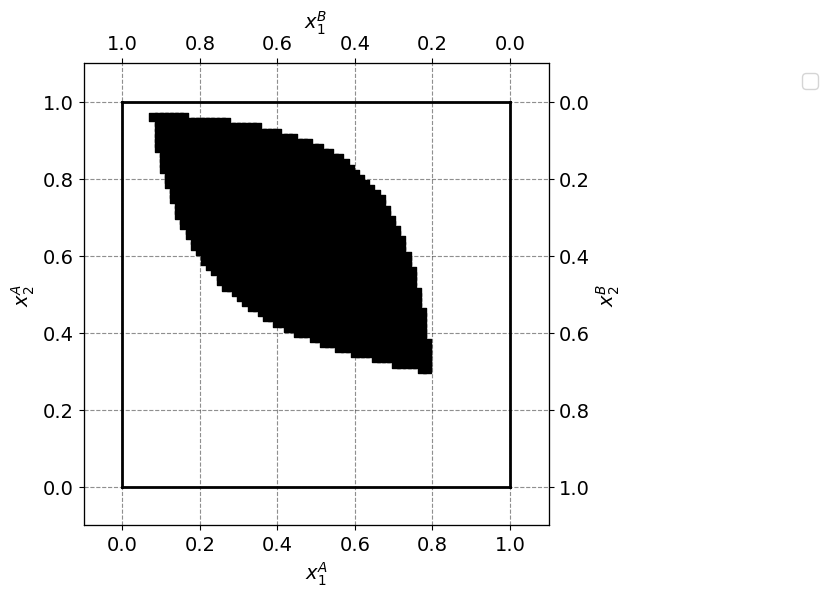

In [2]:
model = ExchangeEconomyClass()
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A Plotting the exchange lens in the Edgeworth box
N = 75
c = []
for i in range(N+1):
    x1A = i/N
    for j in range(N+1):
        x2A = j/N
        if model.utility_A(x1A, x2A) >= model.utility_A(par.w1A, par.w2A) and model.utility_B(1-x1A, 1-x2A) >= model.utility_B(par.w1B, par.w2B):
            c.append([x1A, x2A])
            ax_A.scatter(x1A,x2A,marker='s',color='black')
    


# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 2 - Market clearing error

Still using N = 75, I let the for-loop run until i = 150, setting the final p1 = 0.5 + 150/75 = 2.5
The function check_market_equilibrium is printed out for all p1

In [3]:
P1 = []
N = 75

for i in range(2 * N + 1):
    p1 = 0.5 + i / N
    P1.append(p1)

print(P1)
    


[0.5, 0.5133333333333333, 0.5266666666666666, 0.54, 0.5533333333333333, 0.5666666666666667, 0.58, 0.5933333333333334, 0.6066666666666667, 0.62, 0.6333333333333333, 0.6466666666666667, 0.66, 0.6733333333333333, 0.6866666666666666, 0.7, 0.7133333333333334, 0.7266666666666667, 0.74, 0.7533333333333334, 0.7666666666666666, 0.78, 0.7933333333333333, 0.8066666666666666, 0.8200000000000001, 0.8333333333333333, 0.8466666666666667, 0.86, 0.8733333333333333, 0.8866666666666667, 0.9, 0.9133333333333333, 0.9266666666666667, 0.94, 0.9533333333333334, 0.9666666666666667, 0.98, 0.9933333333333334, 1.0066666666666668, 1.02, 1.0333333333333332, 1.0466666666666666, 1.06, 1.0733333333333333, 1.0866666666666667, 1.1, 1.1133333333333333, 1.1266666666666667, 1.1400000000000001, 1.1533333333333333, 1.1666666666666665, 1.1800000000000002, 1.1933333333333334, 1.2066666666666666, 1.22, 1.2333333333333334, 1.2466666666666666, 1.26, 1.2733333333333334, 1.2866666666666666, 1.3, 1.3133333333333335, 1.32666666666666

# Question 3 - Finding market clearing price

The function find_equilibrium takes in a guess for p1. The function finds the demand for good 1 and 2 given the p1 guess. If the guess does not make the excess demand for good 1 go close to 0, the price is increased by some fraction of the excess demand until the price equals 0 excess demand OR when the function has iterated 500 times. The first number in each line is the number of iterations it took to find p1.

In [4]:
p1_guess = 0.5
model.find_equilibrium(p1_guess)

374: p1 =   0.94444289 -> excess demand for good 1->     0.00000099
374: p1 =   1.00000000 -> excess demand for good 2->    -0.00000093


# Question 4 - Allocations when A chooses prices

4A: Allocation for price in P_1 vector

The for-loop loops through all elements in P_1. If A's demand for either good is negative, the utility is set to 0. When some combination returns a higher utility than the previous highest utility, that utility and price are stored as the optimal utility and price level

No optimal p1 is found, as the total demand for either good 1 or good 2 is always > 1 for all elements in P1. To illustrate this, the total demand is printed for the closest fit

In [103]:
util_A_P1_star = 0.0  # Initialize util_A_P1_star to 0.0
p1_star = None  # Initialize p1_star
eps = 1e-2

for p1 in P1:
    demand_B = model.demand_B(p1)

    if max(demand_B) > 1:
        util_A_P1 = 0
    else:
        util_A_P1 = model.utility_A(1 - model.demand_B(p1)[0], 1 - model.demand_B(p1)[1])


    if util_A_P1 > util_A_P1_star:
        util_A_P1_star = util_A_P1
        p1_star = p1

print("Optimal p1:", p1_star)
print('[x1A, x2A] = [1-x1B, 1-x2B] = ',[1-model.demand_B(p1_star)[0], 1-model.demand_B(p1_star)[1]])
print('[x1B, x2B] = ', model.demand_B(p1_star))
print("\nUtility for A:", util_A_P1_star)
print('Utility for B: ', model.utility_B(model.demand_B(p1_star)[0], model.demand_B(p1_star)[1]))


Optimal p1: 1.9
[x1A, x2A] = [1-x1B, 1-x2B] =  [0.6210526315789474, 0.64]
[x1B, x2B] =  (0.3789473684210526, 0.36)

Utility for A: 0.6336208378614051
Utility for B:  0.37252329062837997


4B: Allocation for any positive price where B's utility is not lower than at its level at initial endowment.
As A's utility increases as p1 goes up, I will find the maximum p1 where B's utility is equal to its utility at endowment levels.

In [98]:
# demand_B_from_p1 makes sure that if the price makes the demand for either good > 1, demand for both goods are set to 1, making A's utility 0
def demand_B_from_p1(p1):
    if max(model.demand_B(p1)) > 1:
        demand_B = [1, 1]
    else:
        demand_B = model.demand_B(p1)
    return demand_B

# A's utility is calculated from the left over supply on the market
def utility_A_from_demand_B(p1):
    x1A = 1 - demand_B_from_p1(p1)[0]
    x2A = 1 - demand_B_from_p1(p1)[1]
    return model.utility_A(x1A, x2A)

p1_initial_guess = 1.0

# The negative to the objective function is evaluated as the optimizer minimizes
result = optimize.minimize(lambda p1: -utility_A_from_demand_B(p1), p1_initial_guess, method='Nelder-Mead')

p1_opt = result.x[0]

print('Optimal price: p1 = ', p1_opt)
print('[x1A, x2A] = [1-x1B, 1-x2B] = ',[1-demand_B_from_p1(p1_opt)[0], 1-demand_B_from_p1(p1_opt)[1]])
print('[x1B, x2B] = ', demand_B_from_p1(p1_opt))
print('\nUtility for A: ', utility_A_from_demand_B(p1_opt))
print('Utility for B: ', model.utility_B(demand_B_from_p1(p1_opt)[0], demand_B_from_p1(p1_opt)[1]))

Optimal price: p1 =  1.8993164062500023
[x1A, x2A] = [1-x1B, 1-x2B] =  [0.6209642312372534, 0.6400455729166665]
[x1B, x2B] =  (0.3790357687627466, 0.3599544270833334)

Utility for A:  0.6336208506668445
Utility for B:  0.3725655003429665


# Question 5 - Allocations in C

5A: Using the list c made in question 1, the optimal utility for A is found by looping though all allocations in the exchange lens in the Edgeworth box.

The allocation is close to the allocation found in question 4.b when using optimize.minimize()

In [23]:
util_A_C_star = 0.0
p1_c_star = None

for x in c:
    demand_A = x
    demand_B = [1-x[0], 1-x[1]]
    
    D1 = demand_A[0] + demand_B[0]
    D2 = demand_A[1] + demand_B[1]

    util_A_C = model.utility_A(demand_A[0], demand_A[1])
    

    if util_A_C > util_A_C_star:
        util_A_C_star = util_A_C
        c_star_allocation = x
        
print('[x1A, x2A] = ', c_star_allocation)
print('x1B, x2B] = ', [1-c_star_allocation[0], 1-c_star_allocation[1]])
print("Utility for A:", util_A_C_star)
print('Utility for B: ', model.utility_B(demand_B[0], demand_B[1]))


[x1A, x2A] =  [0.56, 0.8533333333333334]
x1B, x2B] =  [0.43999999999999995, 0.1466666666666666]
Utility for A: 0.7415523509091093
Utility for B:  0.30552823018573005


5B: Finding optimal allocation using monotonicity and bounds on x1A and x2A

In [25]:
initial_util_B = model.utility_B(par.w1B, par.w2B)
initial_util_A = model.utility_A(par.w1A, par.w2A)

def free_util_A(x):
    return -model.utility_A(x[0], x[1])

def constraint_function(x):
    # Utility of B must not be lower than at its endowment level
    return model.utility_B(1-x[0], 1-x[1]) - initial_util_B

def free_p1_from_demand(x):
    return par.alpha/(1-par.alpha) * result.x[1] / result.x[0]

# Initial guess and bounds
x0 = [par.w1A, par.w2A]
bounds = ((0, 1), (0, 1))

# Constraint dictionary
constraint = {'type': 'ineq', 'fun': constraint_function}

#Optimize
result = optimize.minimize(free_util_A, x0, bounds=bounds, constraints=constraint)
print('p1 = ', free_p1_from_demand(result.x))
print('[x1A, x2A] = ',result.x)
print('Utility for A: ',model.utility_A(result.x[0], result.x[1]))
print('Initial utility for A: ', initial_util_A)
print('Utility for B: ',model.utility_B(1-result.x[0], 1-result.x[1]))
print('Initial utility for B: ', initial_util_B)

p1 =  0.7333434977494779
[x1A, x2A] =  [0.57574506 0.84443779]
Utility for A:  0.7432276287140577
Initial utility for A:  0.41601676461038084
Utility for B:  0.3036588738576721
Initial utility for B:  0.30365889718756617


# Question 6 - Utilitarian social planner